In [79]:
cd C:\Users\Администратор.WIN-U1NLG8MM702\Desktop

C:\Users\Администратор.WIN-U1NLG8MM702\Desktop


In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('boston.csv') #набор данных Housing, который содержит информацию о домах в окрестностях Бостона

In [6]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


### Features info

Input features in order:  
1) CRIM - уровень преступности на душу населения по городу;  
2) ZN - доля жилых земельных участков с площадью более 25000 квадратных футов (примерно 2 322.5 квадратных метров);  
3) INDUS - доля земель, занимаемых предприятиями нерозничной торговли, по городу;  
4) СНАS - фиктивная переменная реки Чарльз (равна 1, если граничит с рекой, и 0 в противном случае);  
5) NOX - концентрация окиси азота (в десятимиллионных долях);  
6) RМ - среднее количество комнат на дом;  
7) AGE - доля занимаемых собственниками домов, построенных до 1940 года;  
8) DIS - взвешенные расстояния до пяти центров занятости в Бостоне;  
9) RAD - индекс досягаемости до радиальных автомагистралей;  
10) ТАХ - полная ставка налога на недвижимость на $10000;  
11) PTRATIO - пропорция ученик-учитель по городу;  
12) B - результат вычисления B=1000 (Bk - 0.63)^2, где Bk - доля людей афроамериканского происхождения по городу;  
13) LSTAT - процентная доля населения с более низким социальным статусом;  

Output variable:  
1) MEDV: медианная стоимость занимаемых собственниками домов в тысячах долларов

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Text(0.5, 1.0, 'Median value of owner-occupied homes Distribution')

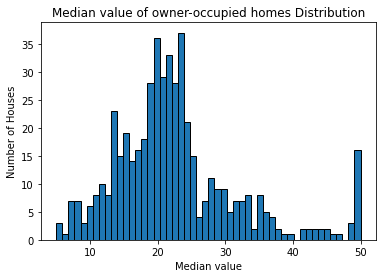

In [8]:
# Исследуем целевую переменную
plt.hist(df['MEDV'], bins = 50, edgecolor = 'k');
plt.xlabel('Median value')
plt.ylabel('Number of Houses')
plt.title('Median value of owner-occupied homes Distribution')

MEDV имеет почти нормальное распределение с рядом выбросов.  
*Обучение линейной регрессионной модели не требует наличия нормального распределения у объясняющих или целевых переменных. Предположение о нормальности является обязательным только для определенных статистических проверок и проверок гипотез.*

In [9]:
cols = ['LSTAT' , 'INDUS', 'NOX' , 'RM', 'MEDV']

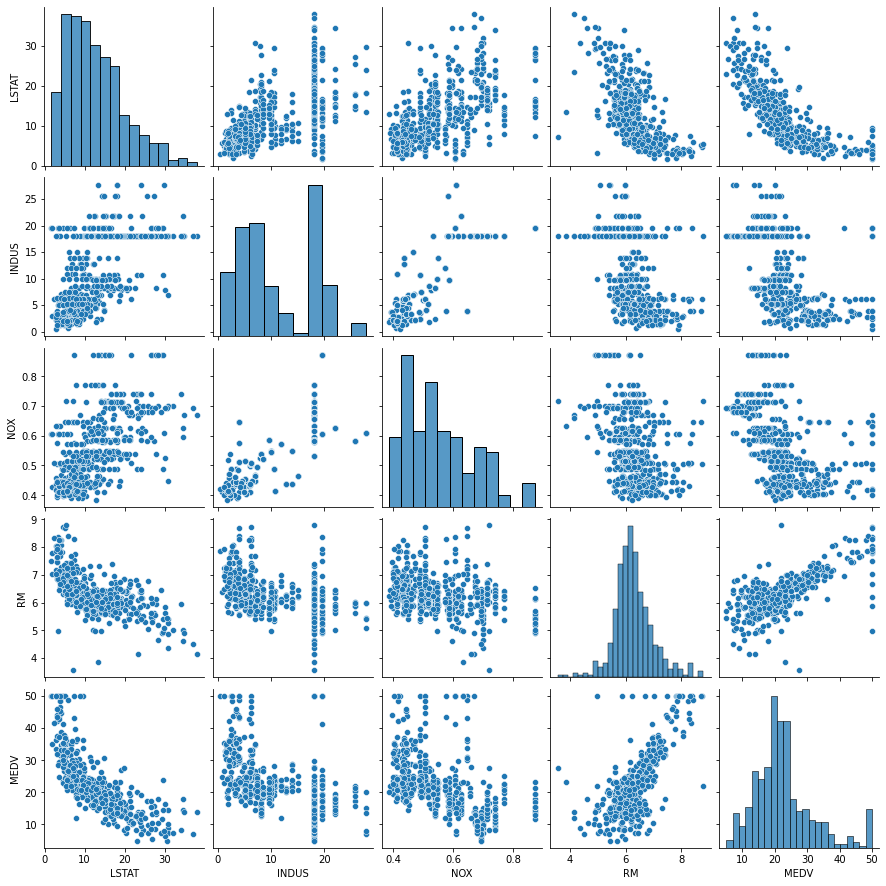

In [10]:
# Ограничим вывод переменных для читабельности
sns.pairplot(df[cols])

На матрице корреляций видно, что среднее количество комнат на дом RM напрямую влияет на медианную стоимость домов, а LSTAT обратно пропорционально MEDV.

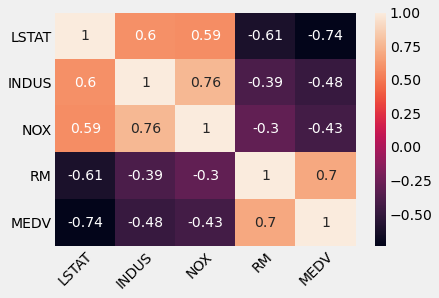

In [106]:
fig, ax = plt.subplots()
sns.heatmap(np.corrcoef(df[cols].values.T), annot=True)

ax.set_xticklabels(cols)
ax.set_yticklabels(cols)
# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

plt.setp(ax.get_yticklabels(), rotation=0);


По тепловой матрице еще раз убедились, что целевая переменная MEDV показывает наибольшую корреляцию с переменной LSTAT (-0.74); однако судя по графику между LSTAT и MEDV существует нелинейная связь. Корреляция между RM и MEDV также высока (О.70) + у них линейная связь. Поэтому RM хорошо подходит для объясняющей переменной.

In [108]:
from sklearn.model_selection import train_test_split
X = df[['RM']].values
y = df['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [109]:
# Обучим модель
model = LinearRegression().fit(np.array(X_train).reshape((-1, 1)), y_train)

In [110]:
# Точность нашей модели

model.score(np.array(X_test).reshape((-1, 1)), y_test)

# Слишком маленькая получилась

0.4834590168919489

In [121]:
y_pred = model.predict(X)
print('Slope: %.3f' % model.coef_[0])
print('Intercept: %.3f' % model.intercept_)

Slope: 9.039
Intercept: -34.222


In [112]:
# Используем все признаки

In [15]:
X2 = df.iloc[:,:13]
y2 = df['MEDV']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [16]:
model2 = LinearRegression().fit(X_train2, y_train2)

In [17]:
model2.score(X_test2, y_test2)
# точность стала выше

0.7261570836552489

In [115]:
print('intercept: %.3f' % model2.intercept_)
print('slope:', model2.coef_)

intercept: 33.335
slope: [-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
 -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
  2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
 -5.47566338e-01]


In [116]:
y_train_pred = model2.predict(X_train2)
y_test_pred = model2.predict(X_test2)

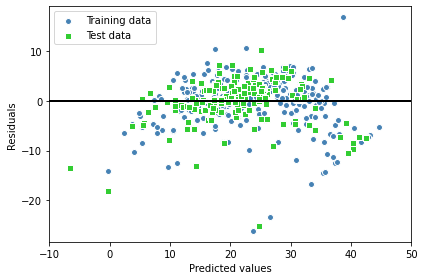

In [127]:
# Строим график остатков
plt.scatter(y_train_pred,  y_train_pred - y_train2,
            c='steelblue', marker='o', edgecolor='white',
            label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test2,
            c='limegreen', marker='s', edgecolor='white',
            label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, color='black', lw=2)
plt.xlim([-10, 50])
plt.tight_layout()

In [128]:
# Вычислим MSE

from sklearn.metrics import mean_squared_error

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train2, y_train_pred),
        mean_squared_error(y_test2, y_test_pred)))

MSE train: 22.985, test: 20.724


#### Использование регуляризированных методов для реrрессии

In [130]:
# Ridge regression:

from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0).fit(X_train2, y_train2)
ridge.score(X_test2, y_test2)

0.7204049996720367

In [133]:
# LASSO regression:

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=1.0).fit(X_train2, y_train2)
lasso.score(X_test2, y_test2)

0.6647359801936796

In [134]:
# Elastic Net regression:

from sklearn.linear_model import ElasticNet
elanet = ElasticNet(alpha=1.0, l1_ratio=0.5).fit(X_train2, y_train2)
elanet.score(X_test2, y_test2)

0.6691595190500959

#### Полиномиальная регрессия

In [140]:
X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [141]:
from sklearn.preprocessing import PolynomialFeatures
# Добавим полиномиальный член второй степени:
lr = LinearRegression()
pr = LinearRegression()
quadratic = PolynomialFeatures(degree=2)
X_quad = quadratic.fit_transform(X)

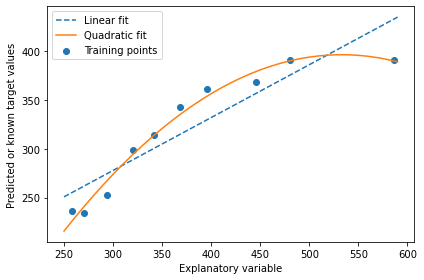

In [142]:
# Выполним подгонку простой линейной регрессионной модели для сравнения:
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# Выполним подгонку множественной регрессионной модели на трансформированных признаках для полиномиальной регрессии:
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# Построим график с результатами
plt.scatter(X, y, label='Training points')
plt.plot(X_fit, y_lin_fit, label='Linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.legend(loc='upper left')

plt.tight_layout()
#plt.savefig('images/10_11.png', dpi=300)
plt.show()

Полиномиальная подгонка улавливает связь между переменной ответа и объясняющей переменной гораздо лучше, чем линейная подгонка.

In [143]:
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

In [144]:
print('Training MSE linear: %.3f, quadratic: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print('Training R^2 linear: %.3f, quadratic: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

Training MSE linear: 569.780, quadratic: 61.330
Training R^2 linear: 0.832, quadratic: 0.982


MSE уменьшается от 570 (линейная подгонка) до примерно 61 (квадратичная подгонка).
Коэффициент модели выше (0.982) по сравнению с линейной моделью (0.832).

#### Моделирование непинейных связей

Cмоделируем связь между ценами на дома и LSTAT с использованием полиномов второго и третьего порядков и сравним ее с линейной подгонкой.

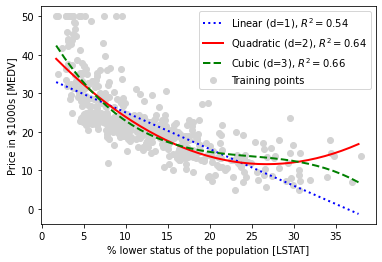

In [146]:
X = df[['LSTAT']].values
y = df['MEDV'].values

regr = LinearRegression()

# create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# fit features
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]

regr = regr.fit(X, y)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y, regr.predict(X))

regr = regr.fit(X_quad, y)
y_quad_fit = regr.predict(quadratic.fit_transform(X_fit))
quadratic_r2 = r2_score(y, regr.predict(X_quad))

regr = regr.fit(X_cubic, y)
y_cubic_fit = regr.predict(cubic.fit_transform(X_fit))
cubic_r2 = r2_score(y, regr.predict(X_cubic))


# plot results
plt.scatter(X, y, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2, 
         linestyle=':')

plt.plot(X_fit, y_quad_fit, 
         label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
         color='red', 
         lw=2,
         linestyle='-')

plt.plot(X_fit, y_cubic_fit, 
         label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
         color='green', 
         lw=2, 
         linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.legend(loc='upper right')

#plt.savefig('images/10_12.png', dpi=300)
plt.show()

Кубическая подгонка улавливает связь между ценами на дома и LSTAT лучше, чем линейная и квадратичная. Однако добавление все большего количества признаков увеличивает вероятность переобучения модели.

Полиномиальные признаки не всегда являются наилучшим выбором для моделирования нелинейных связей. Взглянув на график рассеяния
MEDV-LSTAT, можно выдвинуть гипотезу о том, что логарифмическое преобразование переменной признака LSTAT и квадратный корень MEDV могут спроецировать данные на линейное пространство признаков, подходящее для подгонки с помощью линейной регрессии.  
Связь между двумя переменными выглядит очень похожей на экспоненциальную функцию. Натуральный логарифм экспоненциальной функции представляет собой прямую линию.

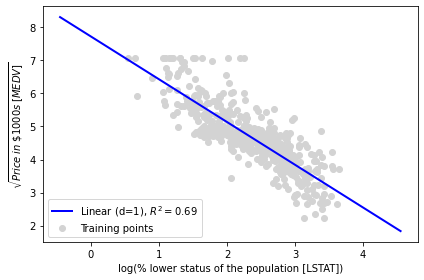

In [147]:
X = df[['LSTAT']].values
y = df['MEDV'].values

# transform features
X_log = np.log(X)
y_sqrt = np.sqrt(y)

# fit features
X_fit = np.arange(X_log.min()-1, X_log.max()+1, 1)[:, np.newaxis]

regr = regr.fit(X_log, y_sqrt)
y_lin_fit = regr.predict(X_fit)
linear_r2 = r2_score(y_sqrt, regr.predict(X_log))

# plot results
plt.scatter(X_log, y_sqrt, label='Training points', color='lightgray')

plt.plot(X_fit, y_lin_fit, 
         label='Linear (d=1), $R^2=%.2f$' % linear_r2, 
         color='blue', 
         lw=2)

plt.xlabel('log(% lower status of the population [LSTAT])')
plt.ylabel('$\sqrt{Price \; in \; \$1000s \; [MEDV]}$')
plt.legend(loc='lower left')

plt.tight_layout()
#plt.savefig('images/10_13.png', dpi=300)
plt.show()

Прямая линейная регрессия лучше подгоняется к данным (R^2=0.69), чем полиномиальные трансформации.

#### Обработка нелинейных связей с использованием случайных лесов

##### Реrрессия на основе дерева принятия решений

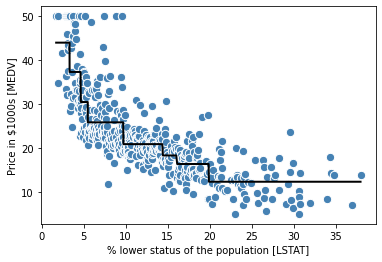

In [148]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
#plt.savefig('images/10_14.png', dpi=300)
plt.show()

Однако ограничение этой модели в том , что она не улавливает непрерывность и дифференцируемость желательного прогноза.

##### Регрессия на основе случайного лeca

In [149]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [150]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.644, test: 11.085
R^2 train: 0.979, test: 0.877


Случайный лес склонен к переобучению обучающими данными. Тем не менее, он по-прежнему способен относительно хорошо раскрывать связь между целевой и объясняющей переменными (R2 = 0.878 на испытательном наборе данных).

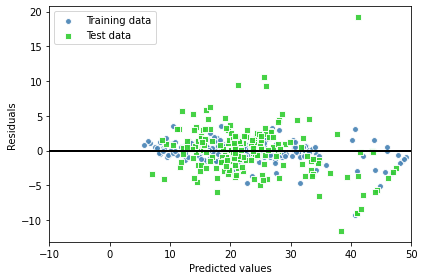

In [151]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='Training data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

#plt.savefig('images/10_15.png', dpi=300)
plt.show()

Распределение остатков вокруг нулевой центральной точки не выглядит полностью случайным, указывая на то, что модель неспособна 
захватывать всю исследовательскую информацию.
Однако график остатков демонстрирует крупное улучшение в сравнении с графиком остатков линейной модели, который
строили ранее.

Для нелинейных задач также можно использовать SVM регрессор.